In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import keras
import matplotlib.pyplot as plt

Reading images

In [3]:
dataset = keras.utils.image_dataset_from_directory(
    'Dataset',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)


Found 12446 files belonging to 4 classes.


In [6]:
data_iterter = dataset.as_numpy_iterator()


In [7]:
batch = data_iterter.next()

In [8]:
batch[1]

array([1, 1, 3, 3, 1, 0, 2, 1, 1, 2, 3, 3, 1, 3, 0, 3, 1, 1, 0, 3, 1, 0,
       0, 0, 0, 3, 3, 1, 0, 1, 1, 1], dtype=int32)

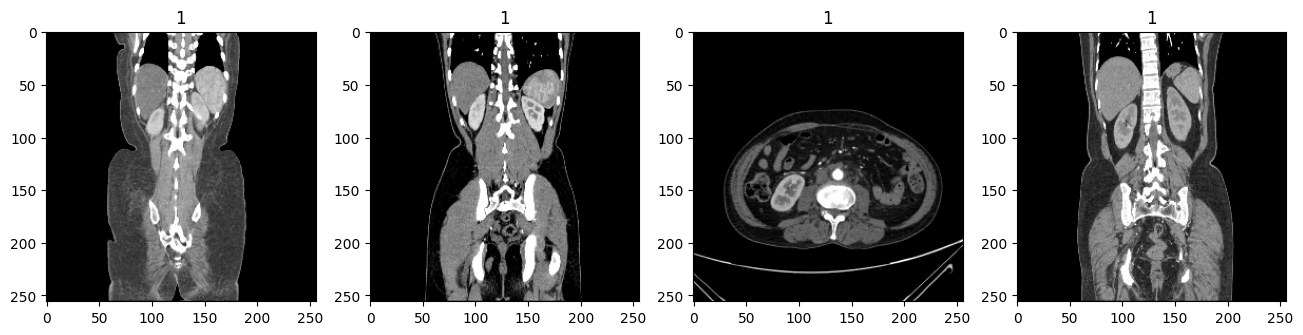

In [9]:
fig,ax = plt.subplots(ncols=4,figsize=(16,9))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [7]:
batch = batch[0] / 255
batch.max()

1.0

In [4]:
dataset = dataset.map(lambda x,y:(x/255,y))

In [10]:
scaled_iterator = dataset.as_numpy_iterator()

In [11]:
batch = scaled_iterator.next()

In [12]:
batch[0].max()

1.0

In [6]:
train_size =int(len(dataset)* 0.7)
val_size =int(len(dataset)* 0.2)+1
test_size =int(len(dataset)* 0.1) + 1

In [7]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset =  dataset.skip(train_size).skip(val_size).take(test_size)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(64, (3, 3),1, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3),1, activation='relu'))
model.add(Conv2D(128, (3, 3),1, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3),1,  activation='relu'))
model.add(Conv2D(256, (3, 3),1,  activation='relu'))
model.add(Conv2D(256, (3, 3),1,  activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     147584    
                                                        

In [20]:
optimizer = Adam(learning_rate=0.001)
loss_fn = SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [22]:
logdir = '/content/drive/My Drive/Colab Notebooks/logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [25]:
hist = model.fit(train_dataset,epochs=20,validation_data=val_dataset,callbacks=[tensorboard_callback])

Epoch 1/20
273/273 [==============================] - 2355s 9s/step - loss: 0.6230 - accuracy: 0.7514 - val_loss: 0.1407 - val_accuracy: 0.9589
Epoch 2/20
273/273 [==============================] - 211s 770ms/step - loss: 0.0542 - accuracy: 0.9821 - val_loss: 0.0171 - val_accuracy: 0.9956
Epoch 3/20
273/273 [==============================] - 211s 769ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0148 - val_accuracy: 0.9941
Epoch 4/20
273/273 [==============================] - 210s 768ms/step - loss: 0.0282 - accuracy: 0.9924 - val_loss: 0.0235 - val_accuracy: 0.9964
Epoch 5/20
273/273 [==============================] - 180s 655ms/step - loss: 0.0230 - accuracy: 0.9944 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 6/20
273/273 [==============================] - 183s 668ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 3.5082e-04 - val_accuracy: 1.0000
Epoch 7/20
273/273 [==============================] - 184s 669ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0023

In [26]:

import json
modelsdir = '/content/drive/My Drive/Colab Notebooks/models/kidneystone.keras'
historydir = '/content/drive/My Drive/Colab Notebooks/history/kidneystone.json'

model.save(modelsdir)

# Save the training history separately
with open(historydir, 'w') as f:
    json.dump(hist.history, f)

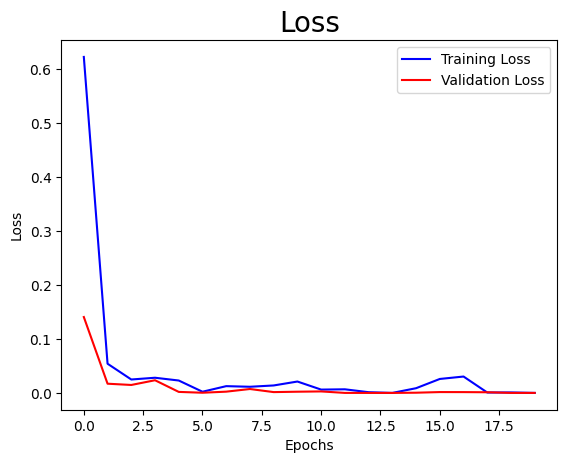

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='Training Loss')
plt.plot(hist.history['val_loss'], color='red', label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

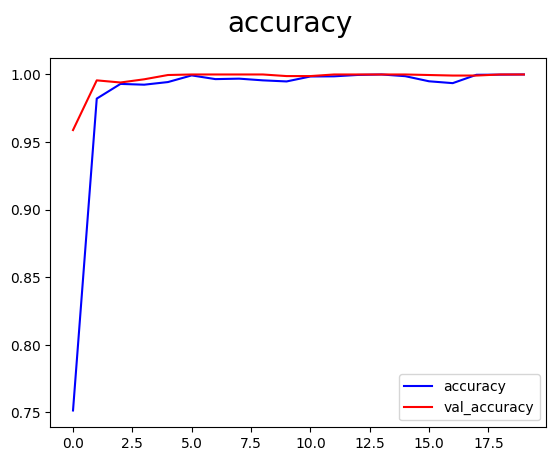

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='lower right')
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy
precision=Precision()
recall=Recall()
accuracy=Accuracy()

In [32]:
for batch in test_dataset.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    class_predictions = np.argmax(yhat, axis=1)
    precision.update_state(y, class_predictions)
    recall.update_state(y,class_predictions)
    accuracy.update_state(y,class_predictions)

1/1 [==============================] - 5s 5s/step


In [33]:
print(f'Precision:{precision.result()},Recall:{recall.result()},Accuracy:{accuracy.result()}')

Precision:1.0,Recall:0.9988235235214233,Accuracy:0.9991748929023743
